In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv('C:\\Neville\\Python\\Session\\Module 10\\driver-data.csv')

In [4]:
dataset.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
dataset.shape

(4000, 3)

In [6]:
dataset.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
dataset.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [11]:
import seaborn as sns

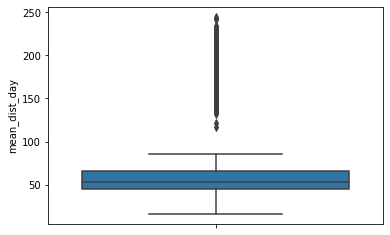

In [13]:
sns.boxplot(data=dataset,y='mean_dist_day')

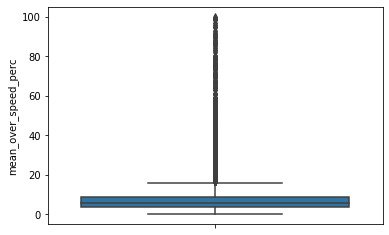

In [14]:
sns.boxplot(data=dataset,y='mean_over_speed_perc')

In [10]:
x=dataset.iloc[:,1:].values

In [11]:
pd.DataFrame(x)

,0,1
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0
...,...,...
3995,160.04,10.0
3996,176.17,5.0
3997,170.91,12.0
3998,176.14,5.0


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[:]=sc.fit_transform(x[:])

In [13]:
x

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x)
    wcss.append(model.inertia_)

In [24]:
import matplotlib.pyplot as plt 

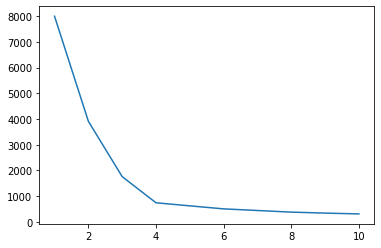

In [25]:
plt.plot(range(1,11),wcss)

In [26]:
model=KMeans(n_clusters=4,init='k-means++')
y_kmeans=kmeans.fit_predict(x)

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y_kmeans)

0.7843727073779272

In [28]:
pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,2
3996,3423312600,176.17,5,2
3997,3423312921,170.91,12,2
3998,3423313630,176.14,5,2
